In [1]:
# Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "..Resources/Mouse_metadata.csv"
study_results_path = "..Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

merged_df =  pd.merge(study_results, mouse_metadata, how = "left", on="Mouse ID")
# Display the data table for preview

merged_df

FileNotFoundError: [Errno 2] No such file or directory: '..Resources/Mouse_metadata.csv'

In [197]:
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [198]:
results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [1]:
merged_df = pd.merge(mouse_df, results_df, on="Mouse ID")
merged_df.to_csv("merged_df.csv")

NameError: name 'pd' is not defined

In [200]:
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [201]:
unique_id = merged_df["Mouse ID"].nunique()
unique_id

249

In [253]:
df_duplicates = merged_df[merged_df.duplicated(["Mouse ID", "Timepoint"])]

In [203]:
index = df_duplicates.index.tolist() 
print(index)
df_duplicates

[909, 911, 913, 915, 917]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [204]:
clean_df = merged_df.drop(index = index)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [205]:
mouse_count = clean_df["Mouse ID"].nunique()
print(mouse_count)

249


In [206]:
mean_volume = clean_df.groupby("Drug Regimen", observed = True)["Tumor Volume (mm3)"].mean()
median_volume = clean_df.groupby("Drug Regimen", observed = True)['Tumor Volume (mm3)'].median()
variance_volume = clean_df.groupby("Drug Regimen", observed = True)['Tumor Volume (mm3)'].var()
stdev_volume = np.sqrt(variance_volume)
sem_volume = clean_df.groupby("Drug Regimen", observed = True)['Tumor Volume (mm3)'].sem()
summary = pd.DataFrame({
    "Mean": mean_volume,
    "Median": median_volume,
    "Variance": variance_volume,
    "Standard Deviation": stdev_volume,
    "SEM": sem_volume
})
summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


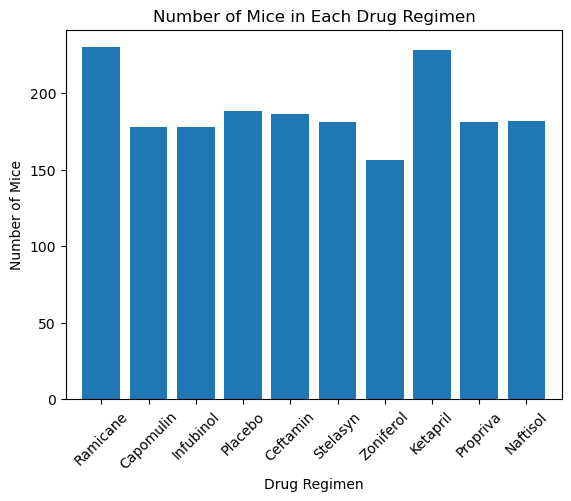

In [241]:
#Bar Chart with matplot - FINISH CLEANING UP

import matplotlib.pyplot as plt

bar_y_values = clean_df.groupby("Drug Regimen", observed = True)["Mouse ID"].count()
bar_x_values = clean_df["Drug Regimen"].unique()

x_axis = np.arange(len(bar_x_values))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, bar_x_values, rotation=45)
plt.xlim(-0.75, len(x_axis)-0.25)

plt.bar(x_values, y_values)

plt.title("Number of Mice in Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()

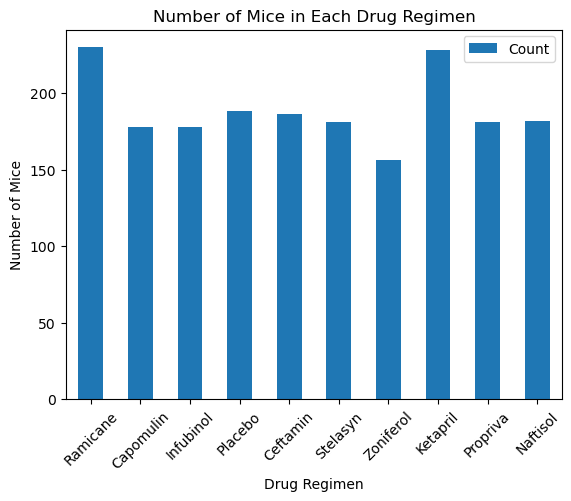

In [243]:
# Bar Chart with Pandas

drug_regimen_count_df = pd.DataFrame({'Drug Regimen': x_values, 'Count':y_values})
ax = drug_regimen_count_df.plot.bar(x='Drug Regimen', y='Count', rot=45)

plt.title("Number of Mice in Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

<Axes: ylabel='Mouse ID'>

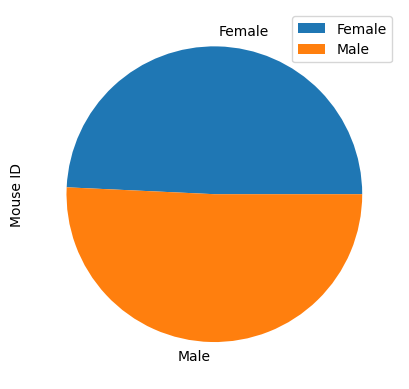

In [209]:
# BAR CHART WITH PANDAS - NOT FINISHED

clean_df.groupby(['Sex']).count().plot(kind='pie', y="Mouse ID")

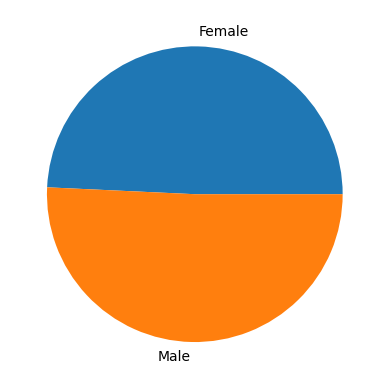

In [246]:
# BAR CHART WITH MATPLOT
sex = ["Female", "Male"]
females = clean_df[clean_df["Sex"] == "Female"]["Mouse ID"].count()
males = clean_df[clean_df["Sex"] == "Male"]["Mouse ID"].count()
sex_count = [females, males]


plt.pie(sex_count, labels=sex)
plt.show()

In [251]:
# Quartiles calculation


last_time_point = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
merge_max_time_df = pd.merge(clean_df, last_time_point, on=["Mouse ID", "Timepoint"])
merge_max_time_df

treatment_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volume = []
outliers = []

for x in range(len(treatment_names)):
    if merge_max_time_df

q1 = np.quantile(tumor_volume, 0.25)
q2 = np.quantile(tumor_volume, 0.50)
q3 = np.quantile(tumor_volume, 0.75)
iqr = q3-q1
upper_outlier = q3+(1.5*iqr)
lower_outlier = q1-(1.5*iqr)

for y in range(len(tumor_volume)):
    if (tumor_volume[y] > upper_outlier or tumor_volume[y] < lower_outlier):
        outliers.append(tumor_volume[y])

In [1]:
# Time versus Tumor Volume for a Capomulin Mouse (Line Graph)

capomulin_total = clean_df[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_total
capomulin_mouse = capomulin_total[capomulin_total["Mouse ID"] == "s185"]
capomulin_mouse

capomulin_time = capomulin_mouse["Timepoint"]
capomulin_tumor_volume = capomulin_mouse["Tumor Volume (mm3)"]

plt.plot(capomulin_time, capomulin_tumor_volume)

plt.title("Volume of s185 Mouse Tumor Volume (mm3) Over Time While on Capomulin Regimen")
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

NameError: name 'clean_df' is not defined

The Correlation Coefficient Is: 0.841936342469472


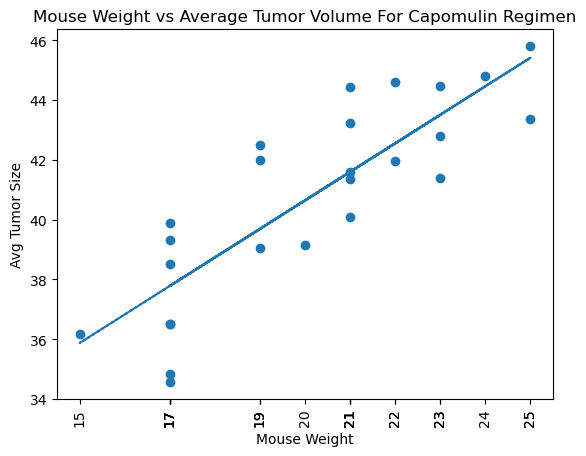

In [256]:
# Weight vs Tumor Volume Scatter Plot

from scipy import stats

mouse_weight = capomulin_total.groupby(["Mouse ID"])["Weight (g)"].mean()
avg_tumor_size = capomulin_total.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()

reg_slope, reg_int, reg_r, reg_p, reg_std_err = stats.linregress(mouse_weight, avg_tumor_size)

print("The Correlation Coefficient Is: " + str(reg_r))

reg_fit = reg_slope * mouse_weight + reg_int

plt.scatter(mouse_weight, avg_tumor_size)
plt.plot(mouse_weight,reg_fit,"--")
plt.xticks(mouse_weight, rotation=90)
plt.xlabel('Mouse Weight')
plt.ylabel('Avg Tumor Size')
plt.title("Mouse Weight vs Average Tumor Volume For Capomulin Regimen")
plt.show()